# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
players_df = pd.read_csv(r"E:\Data Science Projects\Project Files\Unsupervised algorithm\players_22.csv\players_22.csv")

In [3]:
players_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


# EDA and Visualization

In [4]:
players_df.shape

(19239, 110)

In [5]:
features=['overall','potential','wage_eur','value_eur','age']

In [6]:
players_df=players_df.dropna(subset=features)

In [7]:
data=players_df[features].copy()

In [8]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


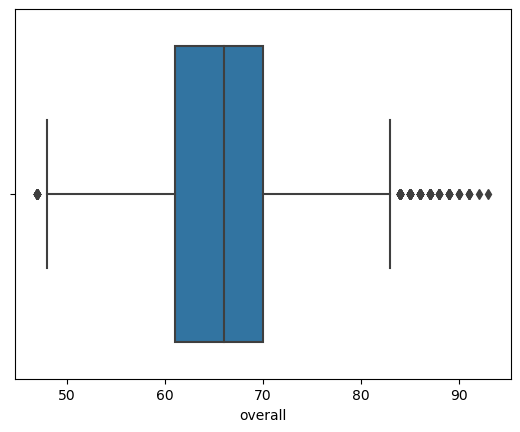

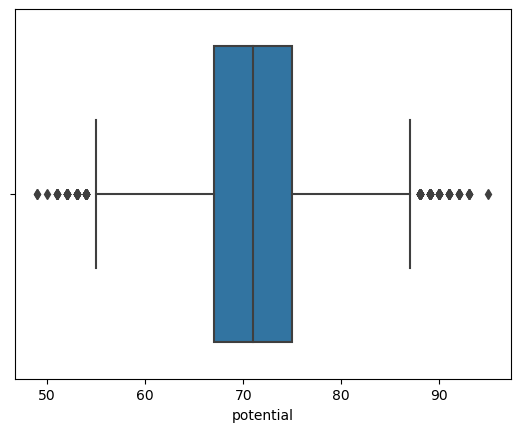

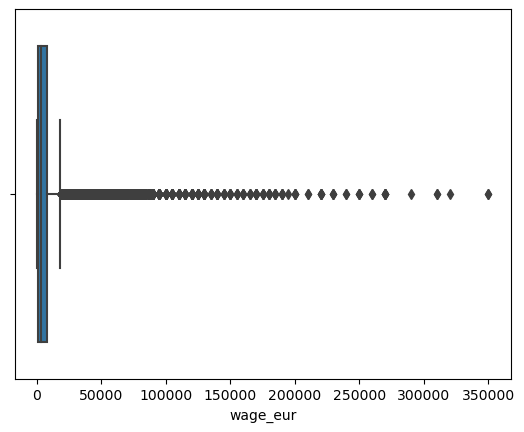

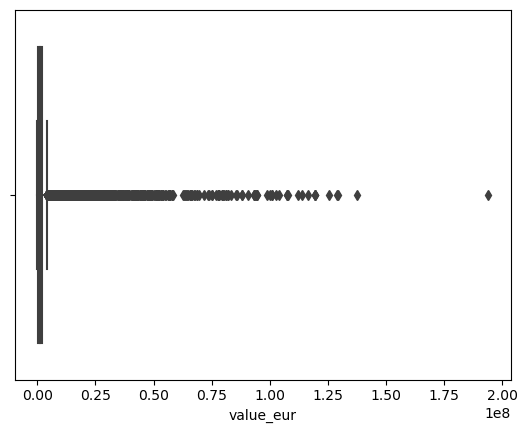

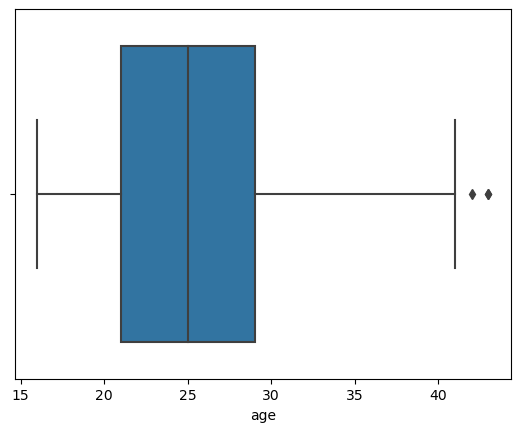

In [9]:
for i in data.columns:
    sns.boxplot(x=data[i])
    plt.show()

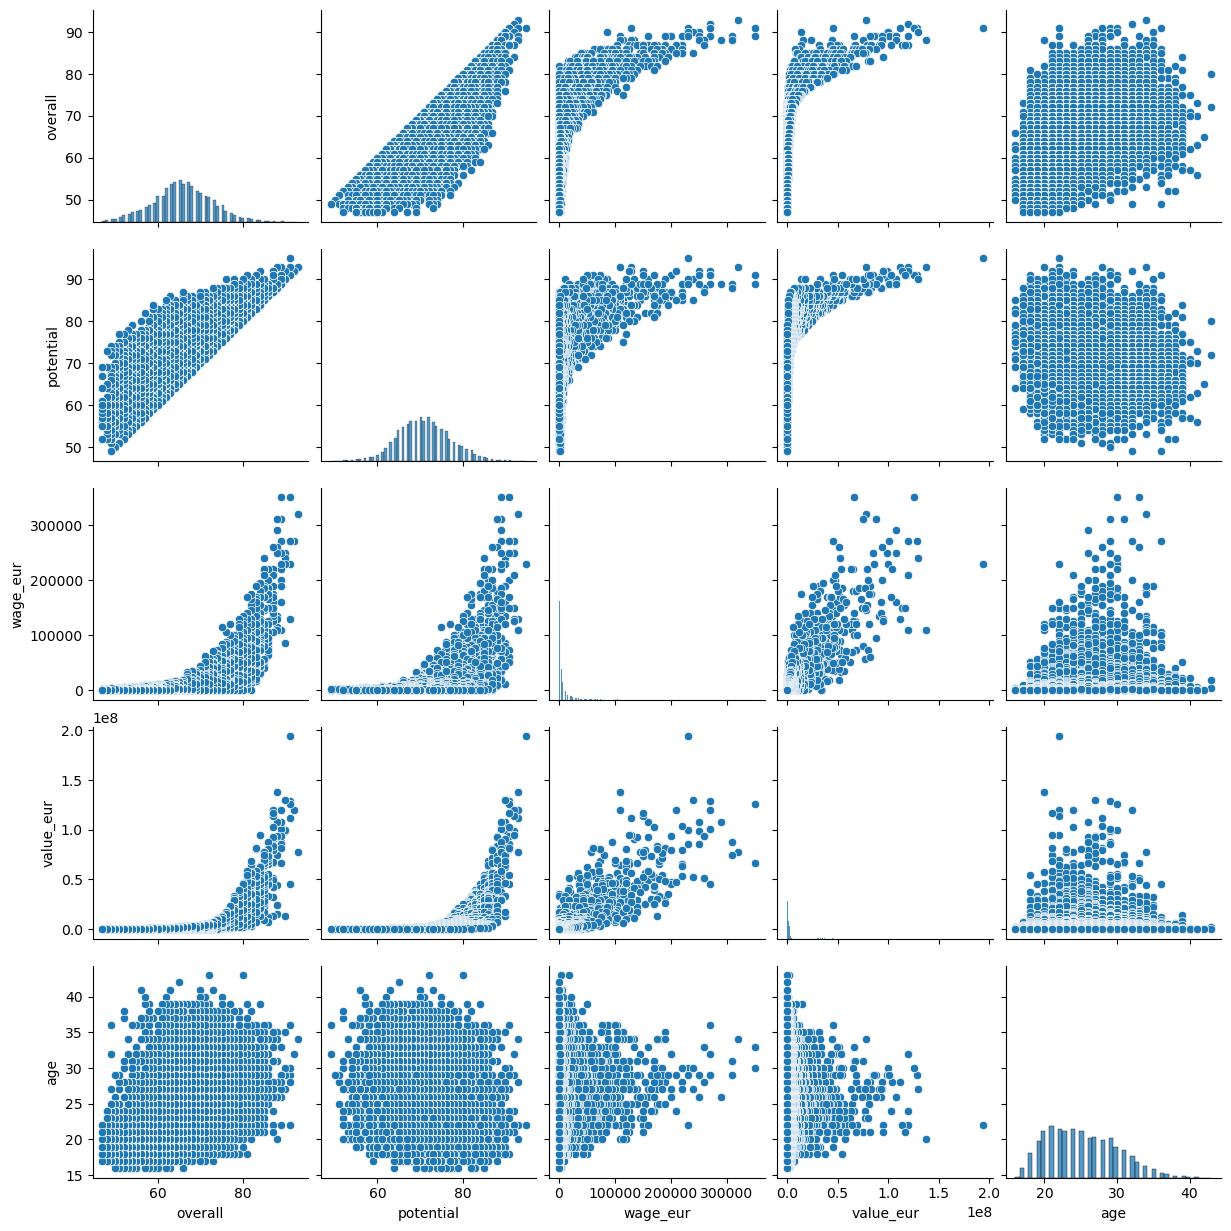

In [10]:
sns.pairplot(data)

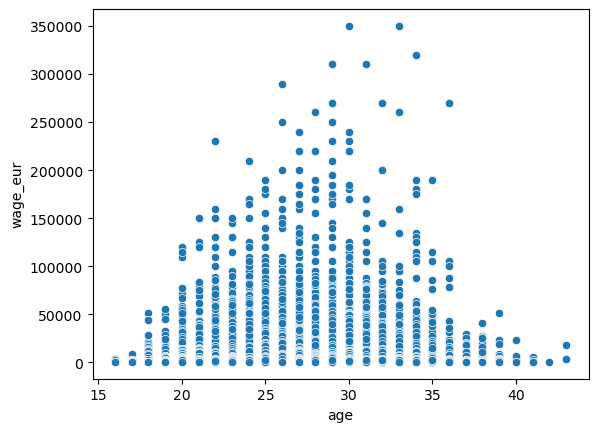

In [11]:
sns.scatterplot(x='age',y='wage_eur',data=data)
plt.show()

<Axes: xlabel='age', ylabel='value_eur'>

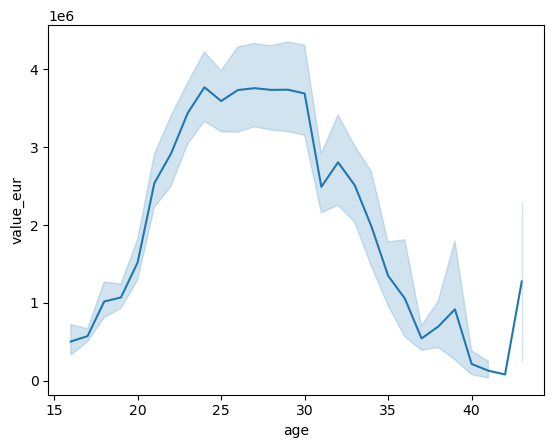

In [12]:
sns.lineplot(x='age',y='value_eur',data=data)

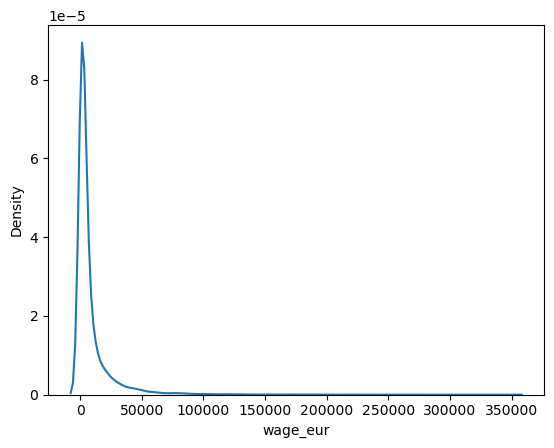

In [13]:
sns.kdeplot(x='wage_eur',data=data)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

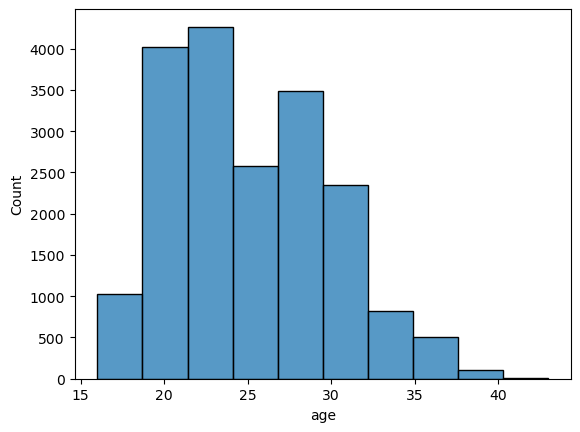

In [14]:
sns.histplot(x='age',bins=10,data=data)

<Axes: >

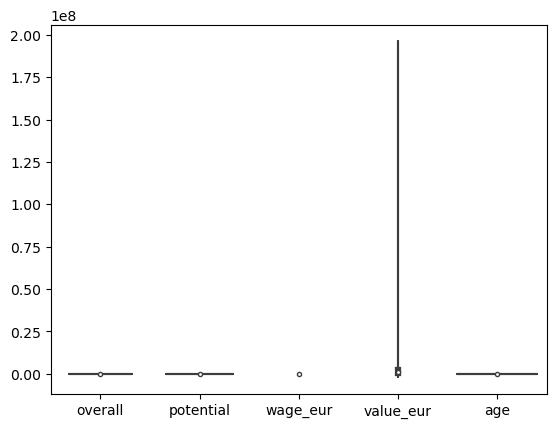

In [15]:
 sns.violinplot( data=data)

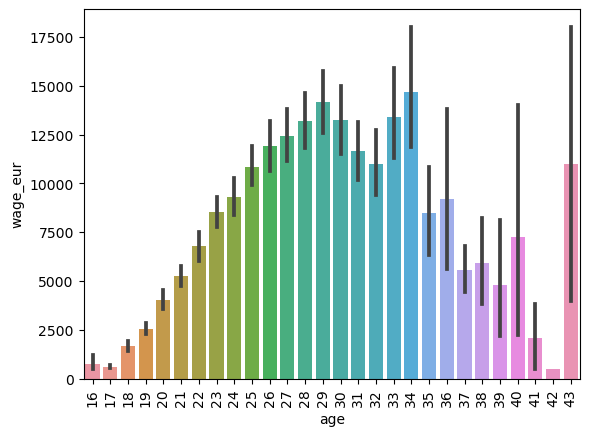

In [16]:
sns.barplot(x="age",y="wage_eur",data=data)
plt.xticks(rotation=90)
plt.show()

# Scaling Data

In [17]:
data=((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [18]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [20]:
centroids=random_centroids(data,5)

In [21]:
centroids

,0,1,2,3,4
overall,3.739130,7.652174,3.347826,4.521739,4.913043
potential,2.173913,4.521739,4.521739,4.913043,3.934783
wage_eur,1.399142,1.218884,1.007725,1.000000,1.141631
value_eur,1.180519,1.034378,1.175879,1.029738,1.101649
age,3.333333,1.666667,5.333333,3.666667,2.333333


In [22]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [23]:
labels = get_labels(data,centroids)

In [24]:
labels.value_counts()

3    12848
2     4212
0      818
4      770
1      517
Name: count, dtype: int64

In [25]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

# PCA

In [26]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [27]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()


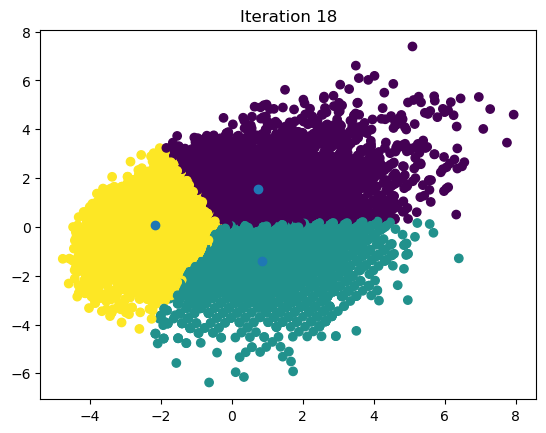

In [28]:
max_iterations = 100
k=3

centroids = random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration =1

while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    
    labels=get_labels(data,centroids)
    centroids = new_centroids(data,labels, k)
    plot_cluster(data, labels, centroids, iteration)
    iteration += 1

In [29]:
centroids

,0,1,2
overall,5.807503,4.781960,3.205672
potential,6.497870,4.506813,4.930905
wage_eur,1.420500,1.118498,1.028564
value_eur,1.285685,1.044909,1.026655
age,3.598215,5.467648,2.514741


In [30]:
players_df[labels ==1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


# KMeans

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(3)

In [33]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [34]:
centroids=kmeans.cluster_centers_

In [35]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.800460,6.210055,3.587122
potential,4.501645,6.607522,5.198413
wage_eur,1.112823,1.646976,1.039359
value_eur,1.039900,1.407513,1.035310
age,5.616384,4.126952,2.709082


In [36]:
#Elbow method

wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=25)
    kmeans.fit(data)
    
    wcss.append(kmeans.inertia_)


In [37]:
wcss

[116740.5025497065,
 74273.1381008405,
 51663.985688553716,
 41921.112070456285,
 35179.88728999961,
 30518.54500695888,
 26527.552088666842,
 23852.320933146504,
 21651.118307793884,
 19727.519439476724]

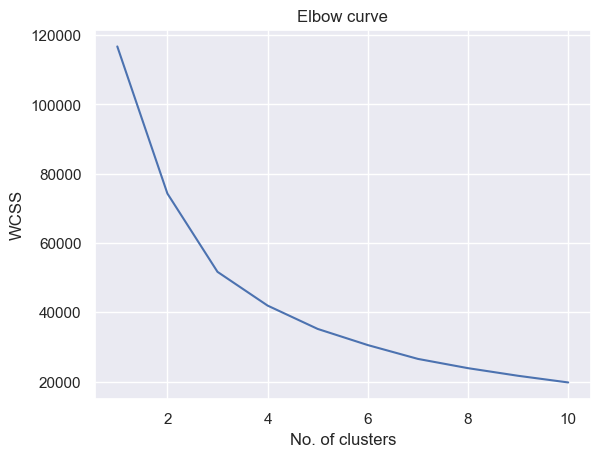

In [38]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y=kmeans.fit_predict(data)


In [40]:
print(y)

[2 2 2 ... 0 0 0]


In [41]:
data_output = data.copy(deep = True)
data_output['Cluster'] = kmeans.labels_
data_output.head()

,overall,potential,wage_eur,value_eur,age,Cluster
0,10.000000,9.608696,9.227468,4.618307,7.000000,2
1,9.804348,9.413043,7.939914,6.543654,6.333333,2
2,9.608696,9.217391,7.939914,3.087308,7.666667,2
3,9.608696,9.217391,7.939914,6.984396,5.333333,2
4,9.608696,9.217391,10.000000,6.822018,5.666667,2


<Axes: xlabel='Cluster', ylabel='count'>

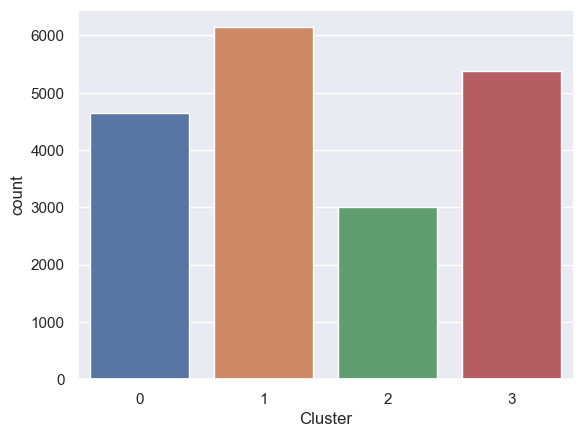

In [42]:
sns.countplot(x='Cluster',data=data_output)

In [43]:
np.unique(kmeans.labels_, return_counts=True)  

(array([0, 1, 2, 3]), array([4651, 6142, 2998, 5374], dtype=int64))

In [44]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
silhouette_avg = silhouette_score(data, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3306415427738189


In [45]:
calinski_harabasz_index = calinski_harabasz_score(data, y)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 11399.358190897265


In [46]:
davies_bouldin_index = davies_bouldin_score(data, y)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.9890325845696226


# Hierarchical Clustering

In [47]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [48]:
Z = sch.linkage(data,method='ward')
Z

array([[1.60000000e+01, 1.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.54000000e+02, 2.70000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.73000000e+02, 3.76000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.83220000e+04, 3.83240000e+04, 1.50062967e+02, 9.62000000e+03],
       [3.83230000e+04, 3.83250000e+04, 1.92818967e+02, 9.54500000e+03],
       [3.83260000e+04, 3.83270000e+04, 2.84734519e+02, 1.91650000e+04]])

Text(0.5, 1.0, 'Hierarchical Clustering')

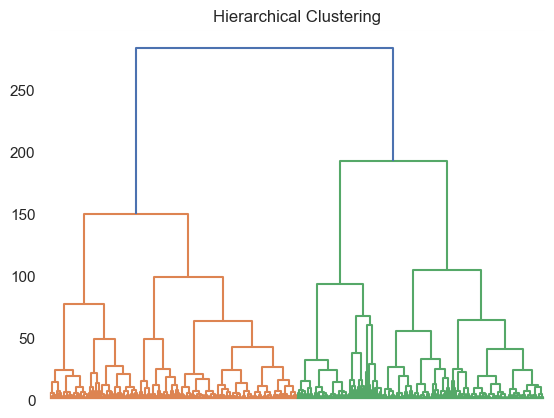

In [49]:
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')


In [50]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('Sample index or (cluster size)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x,y), xytext=(0, -5), 
                            textcoords='offset points',
                            va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k', linestyle='--', label='Cutting Line')
            plt.legend()
    return ddata

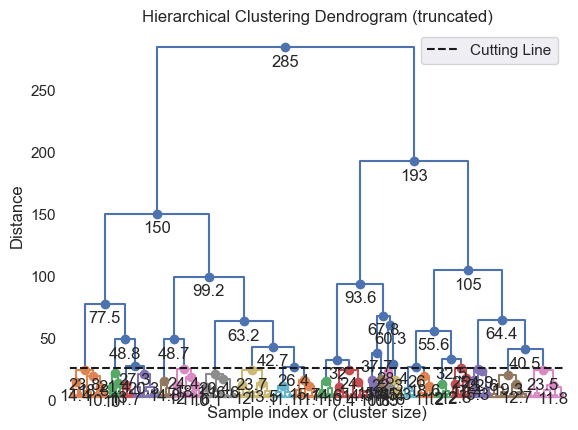

In [51]:
fd(Z, leaf_rotation=90., show_contracted=True, annotate_above=10, max_d=25)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

# Agglomerative Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [54]:
y_cluster = hc_model.fit_predict(data)

In [55]:
y_cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [56]:
data_out = data.copy(deep = True)
data_out['Cluster'] = hc_model.labels_
data_out.head()

,overall,potential,wage_eur,value_eur,age,Cluster
0,10.000000,9.608696,9.227468,4.618307,7.000000,0
1,9.804348,9.413043,7.939914,6.543654,6.333333,0
2,9.608696,9.217391,7.939914,3.087308,7.666667,0
3,9.608696,9.217391,7.939914,6.984396,5.333333,0
4,9.608696,9.217391,10.000000,6.822018,5.666667,0


In [57]:
np.unique(hc_model.labels_, return_counts=True) 

(array([0, 1], dtype=int64), array([9545, 9620], dtype=int64))

In [60]:
silhouette_avg = silhouette_score(data, y_cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33823622989676916


In [59]:
calinski_harabasz_index = calinski_harabasz_score(data, y_cluster)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 10193.846463007581


In [61]:
davies_bouldin_index = davies_bouldin_score(data, y_cluster)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 1.1793518853344636
